# HW 9: Inventory (Solution)
---
`ISE 754, Fall 2024`

__Assigned:__ Mon, 6 Nov (Individual Assignment)  
__Due:__ 10:00a, Mon, 2 Dec  

Solve question 1 by hand (you can submit a scanned copy of your solution, or you can turn in a paper copy in class), and then, for all the other questions, use the Code cells in this Jupyter Notebook to answer the questions. Please run all the cells in your notebook and then submit it as a .ipynb file, along with a .html or .pdf copy, via Moodle. (There is a _Run All Cells_ command under the _Run_ menu.)


---
__(1)__ A factory in Savannah is considering two suppliers for a component with an annual demand of 300 tons. The first is located in Monterrey, Mexico, and can provide each ton at \\$12,000 and ship each three-day-in-transit 15-ton truckload for \\$5,000. The second supplier is located in Busan, South Korea, and can provide each ton at \\$11,500 and ship each 45-day-in-transit 15-ton container for \\$2700. Each ton of components loses 10% of its value every month. Which supplier should be selected?

In [1]:
# Common
f = 300                                                      # ton/yr
xh = 0.1
th = 1/12                                                    # yr
@show hobs = xh/th                                                 # 1/yr
@show h = 0.05 + 0.06 + hobs                                       # 1/yr

# Supplier 1
t = 3/365.25
q = 15                                                       # ton/L
cL = 5000                                                    # $/L
v = 12000                                                    # $/ton
@show n = f/q                                                # L/yr
@show qI = n*q*t                                             # ton
ICw = v*h*qI                                                 # $/yr
TC = n * cL                                                  # $/yr
PC = n * q * v                                               # $/yr
TLC = TC + ICw + PC                                          # $/yr
println("TC = ", TC, "\nICw = ", ICw, "\nPC = ", PC, "\nTLC = ", TLC)

# SUpplier 2
t = 45/365.25
q = 15                                                       # ton/L
cL = 2700                                                    # $/L
v = 11500                                                    # $/ton
@show n = f/q                                                # L/yr
@show qI = n*q*t                                             # ton
ICw2 = v*h*qI                                                # $/yr
TC2 = n * cL                                                 # $/yr
PC2 = n * q * v                                              # $/yr
TLC2 = TC2 + ICw2 + PC2                                      # $/yr
println("TC2 = ", TC2, "\nICw2 = ", ICw2, "\nPC2 = ", PC2, "\nTLC2 = ", TLC2)

# Select supplier
println("Select supplier in ", TLC < TLC2 ? "Monterrey" : "Busan")

hobs = xh / th = 1.2000000000000002
h = 0.05 + 0.06 + hobs = 1.3100000000000003
n = f / q = 20.0
qI = n * q * t = 2.4640657084188913
TC = 100000.0
ICw = 38735.11293634498
PC = 3.6e6
TLC = 3.738735112936345e6
n = f / q = 20.0
qI = n * q * t = 36.96098562628337
TC2 = 54000.0
ICw2 = 556817.248459959
PC2 = 3.45e6
TLC2 = 4.060817248459959e6
Select supplier in Monterrey


---
__(2)__ Use the 7-weeks of data in the file `HW9data.csv` to answer the following questions:

(a) Determine the total profit for all of the procedures listed in the last table of the _Inv 1_ notebook except for multiple regression (this is because there are no website visitor data in the file).

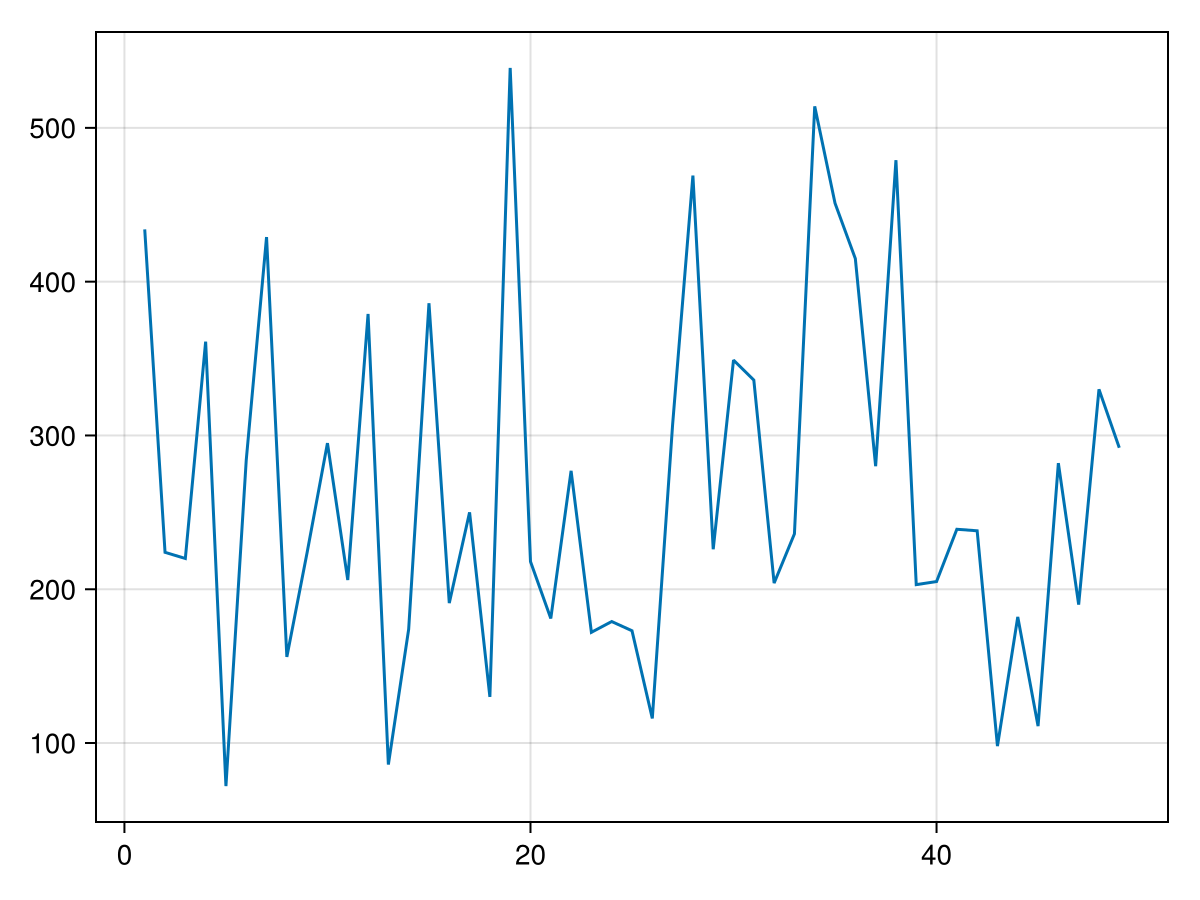

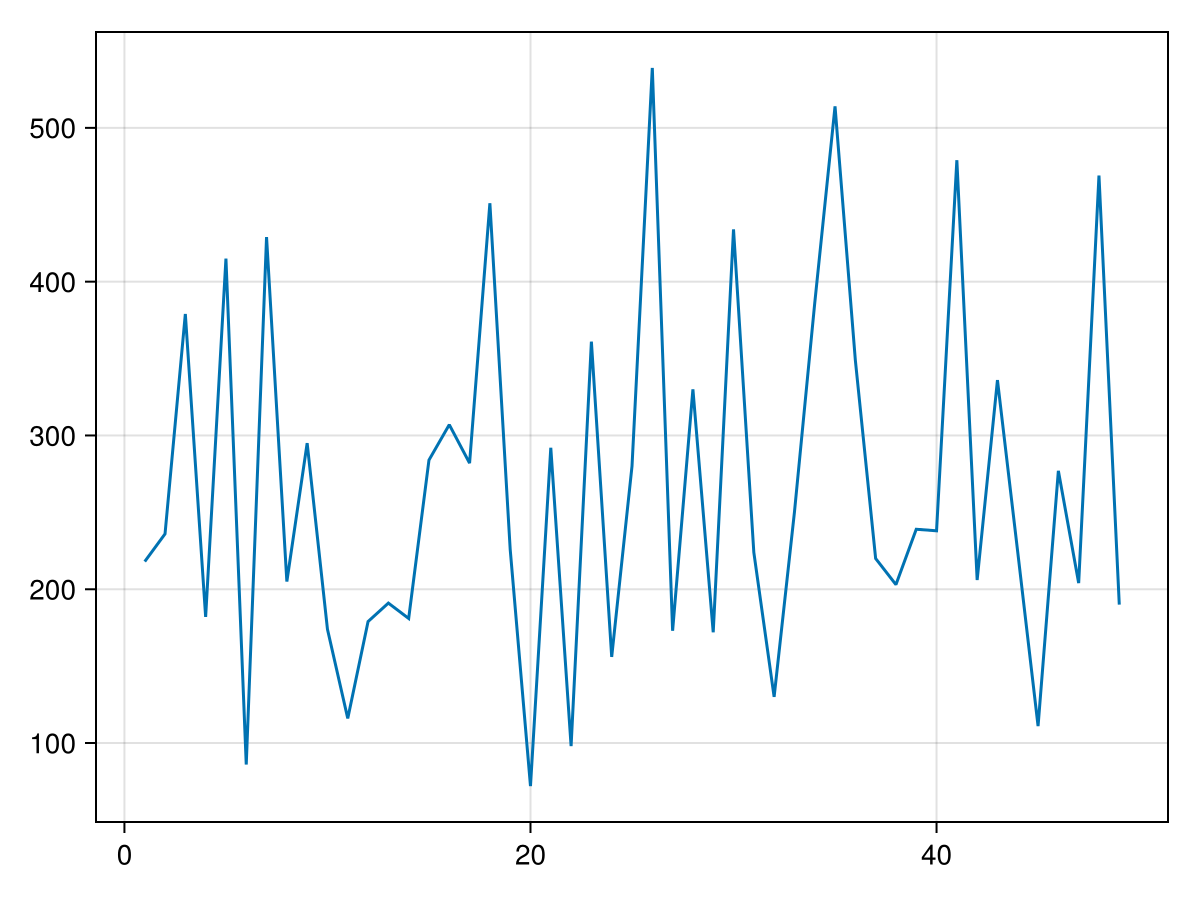

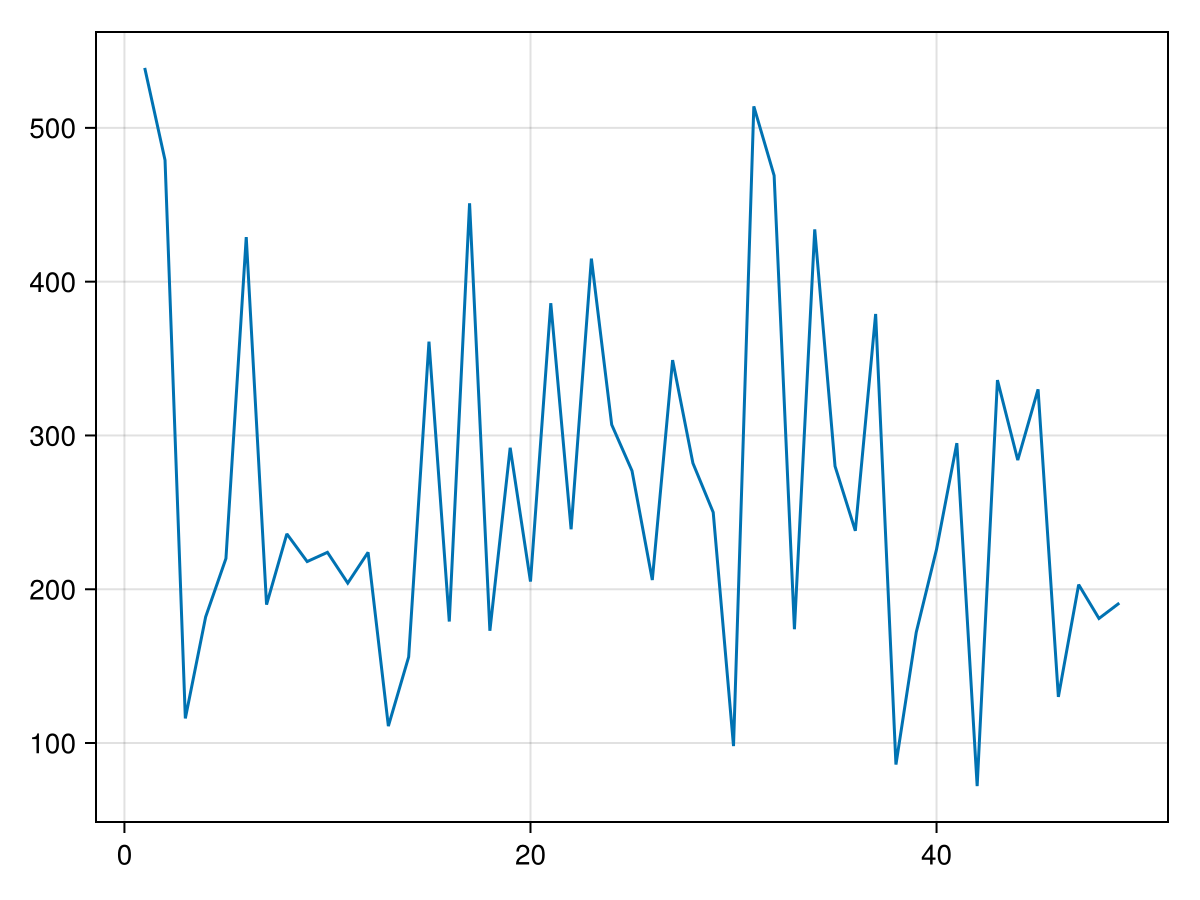

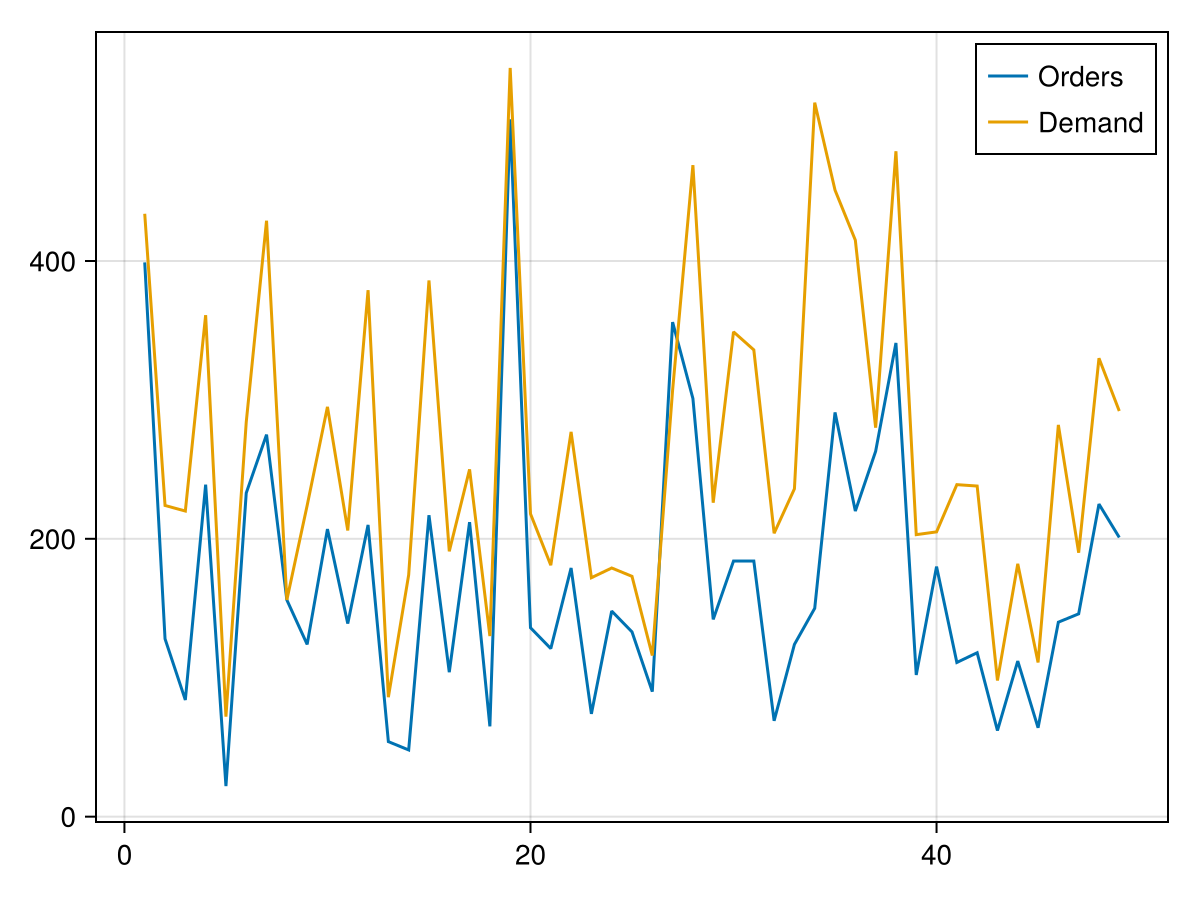

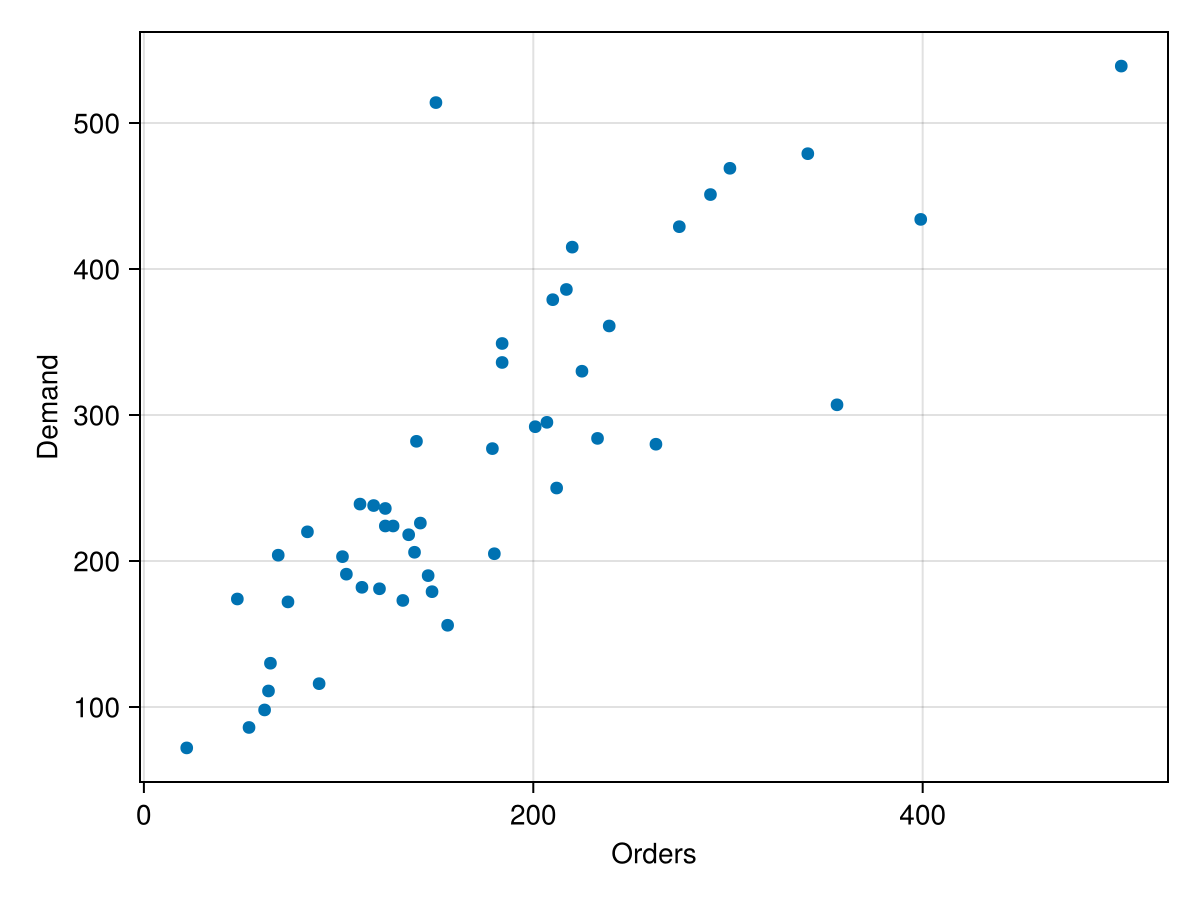

cor(o, d) = 0.8245080587752308


Row,Procedure,Total_Profit
,String,Int64
1,Baseline,36961
2,Single parameter mean,40368
3,Single parameter median,38641
4,Single parameter max profit,42864
5,Using just order data,33295
6,Linear regression,47786
7,Perfect prediction,51968


In [2]:
using DataFrames, CSV, CairoMakie, Random, Statistics, Optim

dcf() = display(current_figure())

df = DataFrame(CSV.File("HW9data.csv"))
d, o = Int.(df.Demand), Int.(df.Orders)

display(lines(d))
display(lines(d[randperm(length(d))]))
display(lines(d[randperm(length(d))]))

p = 5                                    # Unit price
c = 1                                    # Unit cost
fπ(q, di) = p*min(q, di) - c*q           # Profit per day (fπ ⟹ f\pi<TAB>)  
fΠ(q, d) = sum(fπ(q, di) for di in d)    # Total profit (fΠ ⟹ f\Pi<TAB>)

Πᴮᴸ = fΠ(216, d)
df = DataFrame(Procedure = "Baseline", Total_Profit = Int(round(Πᴮᴸ)))
push!(df,("Single parameter mean", Int(round(fΠ(mean(d), d)))))
push!(df,("Single parameter median", Int(round(fΠ(median(d), d)))))

qᵒ = optimize(q -> -fΠ(q,d), 0, 500).minimizer
push!(df,("Single parameter max profit", Int(round(fΠ(qᵒ,d)))))

lines(o, label="Orders")
lines!(d, label="Demand")
axislegend()
dcf()
display(scatter(o, d, axis=(xlabel="Orders", ylabel="Demand")))
@show cor(o, d)

fΠ(q, d) = sum(fπ(qi, di) for (qi,di) in zip(q, d))
push!(df,("Using just order data", Int(round(fΠ(o, d)))))

fd̂(α, o) = α[1] .+ α[2]o
αΠᵒ = optimize(α -> -fΠ(fd̂(α, o),d), [0. 1.]).minimizer
push!(df,("Linear regression", Int(round(fΠ(fd̂(αΠᵒ, o), d)))))

Πᵁᴮ = (p - c)*sum(d)
push!(df,("Perfect prediction", Int(round(Πᵁᴮ))))

df

(b) Determine what day 50's size should be if 350 orders have been received at the beginning of day.

In [3]:
println("Day 50's size should be: ", Int(round(fd̂(αΠᵒ,350.))))

Day 50's size should be: 526


(c) The \\$1 cost to bake each loaf of bread used in the analysis only includes the cost of ingredients and the direct labor cost of the baker. It has been estimated that it cost an additional \\$500 to fuel the oven each day for baking the bread, irrespective of the number of loaves baked in the oven. Since order data is available each morning, determine the impact on total profits if no bread were baked any day that the orders were below a threshold of 100, thereby saving \$500 for that day.

In [4]:
is = o .>= 100
dᴹ = d[is]
oᴹ = o[is]
αΠᴹᵒ = optimize(α -> -fΠ(fd̂(α, oᴹ), dᴹ), [0. 1.]).minimizer

k = 500.
Π = fΠ(fd̂(αΠᵒ, o), d) - length(o)*k
Πᴹ = fΠ(fd̂(αΠᴹᵒ, oᴹ), dᴹ) - sum(is)*k
println("Total profit w/o set-up threshold = ", Π,
      "\nTotal profit w/  set-up threshold = ", Πᴹ,
      "\nImpact using threshold = ", abs(Π - Πᴹ), Π > Πᴹ ? " decrease" : " increase")

Total profit w/o set-up threshold = 23286.094861374753
Total profit w/  set-up threshold = 23336.124223583203
Impact using threshold = 50.02936220845004 increase


(d) Describe (in words, no code) a possible procedure to determine the optimal threshold to use.

_Your Procedure:_ Make the threshold value a variable in your procedure and then determine the threshold value that maximizes profit. All thresholds from one to the maximum order value in the data can be used to find the optimal threshold.

---
__(3)__ A firm runs a wilderness adventure program and, at the beginning of each month, purchases a pass to a national park for each customer attending the program at any time during the month because the passes sell out quickly. Unused passes cannot be returned and are illegal to resell. Each pass costs \\$250, and each customer pays \\$850 to attend the program. The number of customers per month over the past year has been

    143, 256, 459, 209, 247, 281, 100, 133, 270, 480, 284, 410

and the number of preorders has been

    52, 128, 167, 105, 244, 193, 81, 76, 217, 468, 195, 341
    
Determine how many passes should be purchased for next month, given that there have already been 190 preorders received for next month's program.

In [5]:
using Optim

d = [143, 256, 459, 209, 247, 281, 100, 133, 270, 480, 284, 410]
o = [52, 128, 167, 105, 244, 193, 81, 76, 217, 468, 195, 341]

p = 850                                    # Unit price
c = 250                                    # Unit cost
fπ(q, di) = p*min(q, di) - c*q 
fΠ(q, d) = sum(fπ(qi, di) for (qi,di) in zip(q, d))
fd̂(α, o) = α[1] .+ α[2]o
αΠᵒ = optimize(α -> -fΠ(fd̂(α, o),d), [0. 1.]).minimizer
println("Number of passes = ", Int(round(fd̂(αΠᵒ, 190))))

Number of passes = 281


---
__(4)__ A base stock inventory policy will be used to stock widgets at an industrial supply store that is open five days per week, fifty weeks per year. Demand for the widgets averages 12 units per day. Each widget can be sold for \\$12, cost \\$9, takes exactly two working days to be received from its supplier and loses all of its value after six months. __REPLACE: Determine the maximum stocking level for the widgets assuming that the widgets cannot be backordered. with:__ Determine the optimal stocking level for the widgets assuming that the widgets cannot be backordered.

In [6]:
using Random, DataStructures, DataFrames, Statistics

function base_stock(qmax, sch, t_stop)

    E = PriorityQueue((:demand, 0) => 0.0)               # Event queue: intial event
    S = Dict(:q => qmax)                                 # State: initial inventory
    out = DataFrame(t=Float64[], evt=Symbol[], q=Int[])  # Output log

    id = 0
    while !isempty(E)
        (evt, _), t = dequeue_pair!(E)                   # Get next event, remove from E
        
        t > t_stop && break                              # Stop simulation if t > t_stop
    
        if evt == :demand                                # Process next event
            id += 1
            enqueue!(E, (:demand, id), sch[1](t))
            if S[:q] > 0
                S[:q] -= 1
                id += 1
                enqueue!(E, (:order, id), sch[2](t))
            end
        elseif evt == :order
            S[:q] += 1
        end
    
        push!(out, (t, evt, S[:q]))                       # Log event and state
    end
    
    return sum(out.q .== 0)/nrow(out), mean(out.q), out
end

p, c = 12, 9                         # Unit price and cost
xh, th = 1, 6/12
@show hobs = xh/th
@show h_yr = 0.05 + 0.06 + hobs      # 1/yr
@show n_yr = 5.0 * 50                # Days per year
@show h = h_yr/n_yr                  # 1/day

rₐ, tₑ = 12.0, 2.0                   # Demand rate and order time
t_stop = n_yr                        # Simulation stopping time

TPh(π₀, q̄) = (p - c)*(1 - π₀)*rₐ - c*h*q̄    # Total profit function

UBqmax = 5round(Int, rₐ)                   # Upper bound for qmax

TPᵒ, qmaxᵒ = -Inf, -1
for i in 0:UBqmax                          # Run base_stock simulation
    sch, rng = [], Xoshiro(1234)
    push!(sch, t -> t + randexp(rng)/rₐ)
    push!(sch, t -> t + tₑ)

    π₀, q̄, _ = base_stock(i, sch, t_stop)
    TP = TPh(π₀, q̄)
    if TP > TPᵒ
        qmaxᵒ, TPᵒ = i, TP
    end
    println(i, "\t", TP, "\t", π₀, "\t", q̄)
end

qmaxᵒ, TPᵒ  # Optimal qmax and total profit

hobs = xh / th = 2.0
h_yr = 0.05 + 0.06 + hobs = 2.11
n_yr = 5.0 * 50 = 250.0
h = h_yr / n_yr = 0.00844
0	0.0	1.0	0.0
1	1.3590431273644372	0.9621689785624212	0.03783102143757881
2	2.8267648495897917	0.921300516560316	0.08447280461865694
3	4.191846862170087	0.8832844574780059	0.13049853372434017
4	5.507016122448979	0.846655328798186	0.17630385487528344
5	6.697623653318703	0.8134942402633023	0.21832144816236973
6	8.05141692879915	0.7757704569606801	0.27444208289054195
7	9.417522267456842	0.7376964699819634	0.33444988405050247
8	10.685338469234617	0.7023511755877939	0.3951975987993997
9	11.98496031128405	0.6660992217898832	0.4669260700389105
10	13.425868878371984	0.6258873639375295	0.5553715097018457
11	14.678403042175615	0.5909195667204425	0.6383959437658446
12	16.08347390561798	0.5516853932584269	0.7352808988764045
13	17.446126894736842	0.5135964912280702	0.8478070175438597
14	18.723827555174626	0.47782301264195415	0.981358474394686
15	19.973637007544006	0.44279128248113997	1.1305532271

(36, 35.01738800131709)

---
__(5)__ Explain why it is necessary to include ordering cost in the total profit associated with the order point inventory model but not in the base stock model.

_Your Answer:_ Order cost is included in the order point model because it is needed to determine when and how often to order, while in the base stock model, ordering is done after each demand, so ordering is a fixed cost and does not need to be included.

---
__(6)__ Using the same example as in notebook _Inv 3_, modify the way DC stockouts are handled so that when a backorder arrives at the DC, it is shipped to a retailer who has the least amount of inventory in stock. Run the modified simulation for the same set of parameters as used in the notebook and report the results.

In [7]:
using Random, DataStructures, DataFrames, Statistics

function base_stock_two_echelon_dispatch(qmax_r, qmax_dc, sch_r, sch_dc, t_stop)
    n = length(qmax_r)                  # Number of retailers

    E = PriorityQueue{Tuple{Symbol, Int, Int}, Float64}()  # Event queue
    for i in 1:n                        # Initial demand events for each retailer
        enqueue!(E, (:demand, i, 0), 0.0)
    end

    # State variables
    S = Dict(
        :q_r => copy(qmax_r),            # Inventory levels at retailers (vector)
        :q_dc => qmax_dc,                # Inventory level at DCr
    )

    # Output log
    out = DataFrame(t=Float64[], evt=Symbol[], loc=Int[], q_r=Vector{Int}[], q_dc=Int[])

    id = 0
    while !isempty(E)
        (evt, i, _), t = dequeue_pair!(E)  # Get next event and time

        t > t_stop && break              # Stop simulation if t > t_stop

        if evt == :demand                # Schedule next demand event for retailer i
            id += 1
            enqueue!(E, (:demand, i, id), sch_r[i][1](t))

            if S[:q_r][i] > 0            # Inventory available, fulfill demand
                S[:q_r][i] -= 1
                id += 1
                enqueue!(E, (:ret2dc_order, i, id), t)  # Immediate order placement
            end

        elseif evt == :ret2dc_order      # Retailer i places order to DC
            if S[:q_dc] > 0              # DC has inventory, fulfill retailer's order
                S[:q_dc] -= 1

                id += 1                  # Schedule arrival of inventory at retailer i
                enqueue!(E, (:dc2ret_ship, i, id), sch_r[i][2](t))

                id += 1                  # DC places immediate replenishment order
                enqueue!(E, (:sup2dc_ship, 0, id), sch_dc(t))
            else                         # DC is out of stock
                id += 1                  # Schedule backorder from supplier
                enqueue!(E, (:sup2dc_backorder, 0, id), sch_dc(t))
            end

        elseif evt == :dc2ret_ship        # Inventory arrives at retailer i from DC
            S[:q_r][i] += 1

        elseif evt == :sup2dc_ship        # DC's replenishment arrives from supplier
            S[:q_dc] += 1
        
        elseif evt == :sup2dc_backorder    # Schedule arrival of backorder at retailer         
            i = argmin(S[:q_r])
            id += 1
            enqueue!(E, (:dc2ret_ship, i, id), sch_r[i][2](t))
        end

        push!(out, (t, evt, i, copy(S[:q_r]), S[:q_dc]))   # Log state
    end

    # Calculate metrics
    π₀_r = zeros(n)
    for i in 1:n
        demands = [row for row in eachrow(out) if row.evt == :demand && row.loc == i]
        stockouts = [row for row in demands if row.q_r[i] == 0]
        π₀_r[i] = length(stockouts) / length(demands)
    end

    # Average inventory levels
    q̄_r = [mean([row.q_r[i] for row in eachrow(out)]) for i in 1:n]
    q̄_dc = mean([row.q_dc for row in eachrow(out)])

    return π₀_r, q̄_r, q̄_dc, out
end

qmax_r, qmax_dc = [8, 8], 30 
rₐ = [3.0, 3.0]
t_dc2ret = [1.0, 1.0]
t_sup2dc = 7.0

n = length(qmax_r)
sch_r = [[] for _ in 1:n]
for i = 1:n
    sch_r[i], rng = [], Xoshiro(1234+i)                                          
    push!(sch_r[i], t -> t + randexp(rng)/rₐ[i])
    push!(sch_r[i], t -> t + t_dc2ret[i])
end                                         
sch_dc = t -> t + t_sup2dc

t_stop = 1000.0
π₀_r, q̄_r, q̄_dc, out = 
    base_stock_two_echelon_dispatch(qmax_r, qmax_dc, sch_r, sch_dc, t_stop)
@show π₀_r
@show q̄_r
@show q̄_dc;

π₀_r = [0.34262680550890157, 0.4552315608919382]
q̄_r = [3.012262984336356, 2.4072032151690026]
q̄_dc = 4.259068425391591
